2024-11-20 21:18:30.616848: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-20 21:18:30.717861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-20 21:18:30.742332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-20 21:18:30.749861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 21:18:30.869045: I tensorflow/core/platform/cpu_feature_guar

Found 2000 files belonging to 2 classes.


I0000 00:00:1732108713.394110     532 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732108713.670880     532 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732108713.670935     532 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732108713.676033     532 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732108713.676424     532 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)
(32, 180, 180, 3)


2024-11-20 21:18:35.775631: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


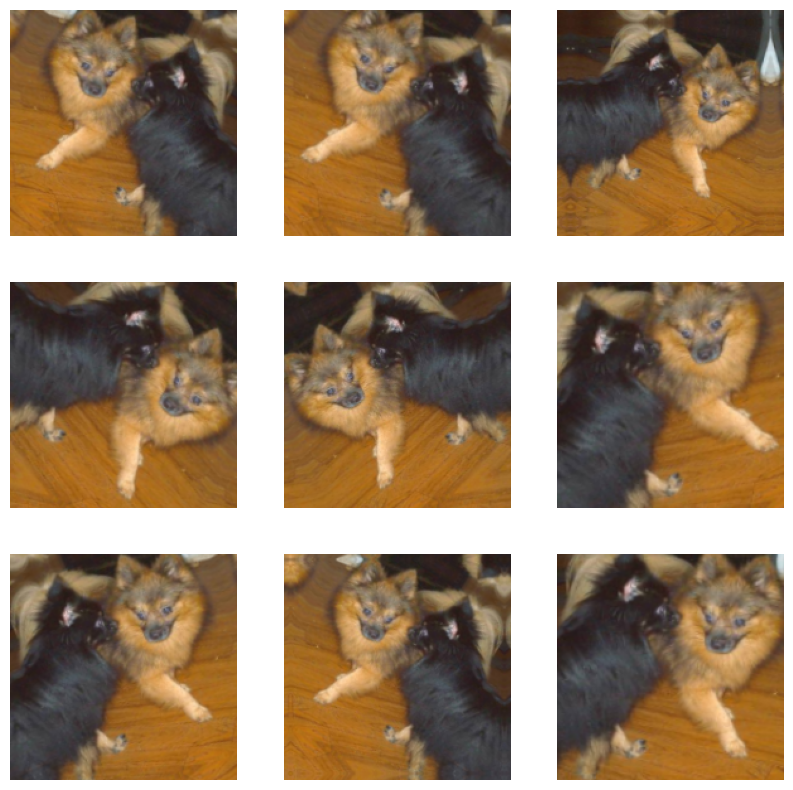

In [1]:
import keras
import keras.layers as layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import image_dataset_from_directory
import os, shutil, pathlib

new_base_dir = pathlib.Path("/home/binbin/dl/python_deep_learning/dogs-vs-cats-small")
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size = (180, 180),
    batch_size = 32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size = (180, 180),
    batch_size = 32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size = (180, 180),
    batch_size = 32
)

data_augmentation = keras.Sequential([
     layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    ])

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    print(images.shape)
    for i in range(9):
        augmented_images = data_augmentation(images)
        print(augmented_images.shape)
        ax = plt.subplot(3,3, i + 1)
        # plt.imshow(augmented_images[0].numpy().astype("uint8"))
        # plt.imshow(augmented_images[9])
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")